In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Classified Data.csv' , index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS' , axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
scaled_features = scaler.transform(df.drop('TARGET CLASS' , axis =1))


In [5]:
df_feat = pd.DataFrame(scaled_features , columns = df.columns[:-1])

In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df_feat , df['TARGET CLASS'] , test_size = 0.3 ,
                                                       random_state = 0)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40) :
    
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train , y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))


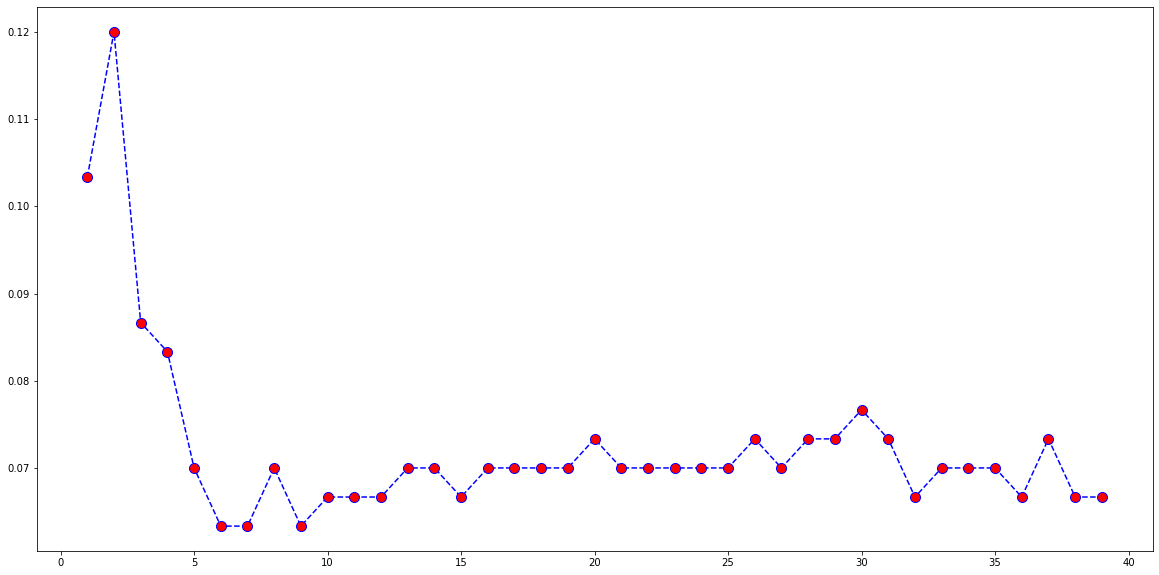

In [8]:
#Plotting graph for error rate 
plt.figure(figsize = (20,10))
plt.plot(range(1,40) , error_rate , color = 'blue' , linestyle = 'dashed' , 
        marker = 'o' , markerfacecolor = 'red' , markersize = 10)

In [9]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(x_train , y_train )
y_pred = knn.predict(x_test)

from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test , y_pred)
print(cm)
report = classification_report(y_test , y_pred)
print(report)

[[131   9]
 [ 10 150]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       140
           1       0.94      0.94      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

